# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

For convenience, we'll use the same ``display`` magic function that we've seen in previous sections:

In [1]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [6]:
import seaborn as sns

In [9]:
import pandas as pd 
import numpy as np


In [13]:
muestras = np.random.randn(10000)


<Axes: ylabel='Count'>

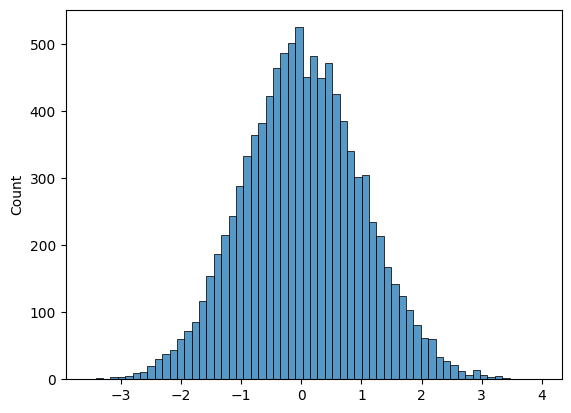

In [15]:
sns.histplot(muestras)

(array([  16.,  159.,  727., 1935., 2930., 2495., 1256.,  407.,   66.,
           9.]),
 array([-3.54060061, -2.79123134, -2.04186207, -1.29249279, -0.54312352,
         0.20624576,  0.95561503,  1.70498431,  2.45435358,  3.20372285,
         3.95309213]),
 <BarContainer object of 10 artists>)

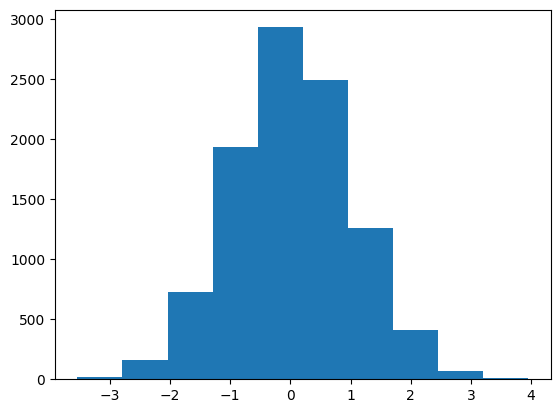

In [14]:
plt.hist(muestras)

<Axes: >

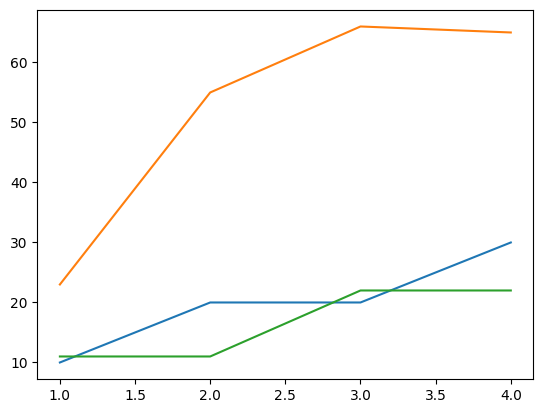

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10, 20, 20, 30])
plt.plot([1,2,3,4], [23, 55, 66, 65])
sns.lineplot(x=[1,2,3,4], y= [11, 11, 22, 22])

In [3]:
# pip install seaborn

In [ ]:
https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/planets.csv

In [16]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [17]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [18]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays (["Aggregations: Min, Max, and Everything In Between"](02.04-Computation-on-arrays-aggregates.ipynb)).
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [7]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [ ]:
ser.sum()

In [ ]:
ser.mean()

For a ``DataFrame``, by default the aggregates return results within each column:

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [ ]:
df.mean(axis='columns')

Pandas ``Series`` and ``DataFrame``s include all of the common aggregates mentioned in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb); in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

In [8]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the ``year`` column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.
This is largely thanks to the *Kepler* mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation.

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [9]:
import pandas as pd

In [19]:
df = pd.DataFrame({'department': ['A', 'B', 'C', 'A', 'B', 'C'],
                   "edificio": [1,1,2,1,1,2],
                   'VV': range(6),
                   "WW": range(0,12,2)})
df

,department,edificio,VV,WW
0,A,1,0,0
1,B,1,1,2
2,C,2,2,4
3,A,1,3,6
4,B,1,4,8
5,C,2,5,10


In [22]:
df.groupby(["edificio", "department"])[["WW"]].max().reset_index()

,edificio,department,WW
0,1,A,6
1,1,B,8
2,2,C,10


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [12]:
df.groupby('department')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [ ]:
df_grouped = df.groupby('department', as_index=False).max()
df_grouped

The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.
We'll discuss each of these more fully in ["Aggregate, Filter, Transform, Apply"](#Aggregate,-Filter,-Transform,-Apply), but before that let's introduce some of the other functionality that can be used with the basic ``GroupBy`` operation.

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [23]:
planets.groupby('method')

In [26]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [27]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [28]:
len(planets['method'].unique())

10

In [33]:
planets.groupby('method')[['orbital_period']].mean().reset_index()

,method,orbital_period
0,Astrometry,631.180000
1,Eclipse Timing Variations,4751.644444
2,Imaging,118247.737500
3,Microlensing,3153.571429
4,Orbital Brightness Modulation,0.709307
5,Pulsar Timing,7343.021201
6,Pulsation Timing Variations,1170.000000
7,Radial Velocity,823.354680
8,Transit,21.102073
9,Transit Timing Variations,79.783500


In [ ]:
# planets[planets['method']=='Astrometry'][['orbital_period']].mean()

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [35]:
planets.groupby('method')

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [38]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods.
Notice that they are applied *to each individual group*, and the results are then combined within ``GroupBy`` and returned.
Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

VAMOS A COGER EL PERIODO ORBITAL, SOLO LA PARTE ENTERA Y DEJAR A TRUE SI ES PAR O A FALSE SI IMPAR

In [66]:
planets.loc[:, "method"].apply(len )

0       15
1       15
2       15
3       15
4       15
        ..
1030     7
1031     7
1032     7
1033     7
1034     7
Name: method, Length: 1035, dtype: int64

In [60]:
def abreviatura(method):
    palabras = method.split()
    abrv = ""
    for palabra in palabras:
        abrv += palabra[0]
    return abrv

In [63]:
abreviatura("Transit")

'T'

In [64]:
planets.loc[:, "method"].apply(abreviatura )

0       RV
1       RV
2       RV
3       RV
4       RV
        ..
1030     T
1031     T
1032     T
1033     T
1034     T
Name: method, Length: 1035, dtype: object

In [50]:
PO_PAR = []
for index, row in planets.iterrows():
    # print(index)
    if pd.isna(row["orbital_period"]):
        PO_PAR.append(np.nan)
        continue

    numerito_entero = int(row["orbital_period"])
    if numerito_entero%2 == 0:
        PO_PAR.append(True)
    else:
        PO_PAR.append(False)
    
planets.loc[:, "orbit_par"] = PO_PAR

In [67]:
pip install geopy

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


In [73]:
direcciones = pd.DataFrame({
    "addresses":  [
    "Madrid 28045, 12 Calle Falsa",
    "Callejón del Gato 3, 41001 Sevilla",
    "08013, Barcelona Carrer de los Peces 45",
    "Zaragoza Avenida del Sol 22, 50018",
    "Granada, 6 Plaza de la Luna, 18010",
    "Calle del Río, Alicante 17 03005",
    "Calle Ancha 88 Vigo 36202",
    "Plaza Mayor 2, 47001 Valladolid",
    "San Sebastián Calle Trucha, 5 - 20003",
    "Avenida de América, 4 Murcia, 30002",
    "Bilbao 48003, 9 Calle de los Pintores",
    "Valencia, Calle Mar 77, 46003",
    "Oviedo, 33001 Calle Oscura 23",
    "07012 Palma de Mallorca - Calle Solitaria 11",
    "Av. de los Olmos, 18 31001 Pamplona",
    "Logroño Callejón de las Letras 27, 26003",
    "Av. del Norte 5 León, 24005",
    "Ciudad Real 13001 - Calle Pétalo 34",
    "Calle Percebe 13, 39002 Santander",
    "Toledo 45003, Avda. de la Sombra 71",
    "08005 Carrer del Vent, 2 Barcelona",
    "Córdoba - 14001, Calle Lirio 55",
    "Albacete 02002, Plaza Cielo Abierto 6",
    "Calle Trueno, 6 Cádiz 11005",
    "Av. Colores, 120 Castellón de la Plana 12004",
    "Plaza Redonda 7 Lugo 27001",
    "Santa Cruz de Tenerife Calle Lava, 14 38002",
    "Callejón Tranquilo 12, 06800 Mérida",
    "Avenida de los Dragones 66 35002 Las Palmas",
    "Calle de la Brisa, 15 Jaén 23003",
    "Paseo de las Nubes, Cuenca 16002, 10",
    "Calle Lunares, 21 - Huelva 21001",
    "Badajoz, 06001 Calle de la Espiga 5",
    "Callejón Cerrado 90, 15001 A Coruña",
    "Av. Horizonte 1 44001 Teruel",
    "Soria 42001, Calle Senda Verde 8",
    "Callejón de los Vientos 17, Burgos 09002",
    "Segovia - Calle del Eco 19, 40001",
    "Guadalajara 19001, Calle Sur 42",
    "Calle Monte Perdido 12, Ceuta 51001",
    "Melilla Calle del Mar 6, 52001",
    "Av. Alegría 22, 34001 Palencia",
    "Calle Arena, 39 Zamora 49001",
    "Calle del Arco, 4 Ávila, 05001",
    "Callejón de la Luz 9, Huesca 22001",
    "Avenida Frambuesa 44, Pontevedra 36001",
    "Calle de las Hadas, 33 Orense 32001",
    "Calle Cactus 17 03007 Alicante",
    "Almería, 04001 Calle Sol Naciente 51",
    "Avenida Oscura, 3 Salamanca 37001",
    "Tarragona Calle Alta 19, 43001",
    "Avda. de la Flor 88, Girona 17001",
    "Av. del Río Seco, 55 Lleida 25001",
    "Calle de los Pájaros, 60 Castellón 12005",
    "Calle Laberinto 9, Valladolid 47002",
    "Calle Horizonte, 77 Vitoria 01001",
    "Plaza del Poeta 8, Donostia 20005",
    "Calle Tormenta 4, 33002 Oviedo",
    "Callejón Brillante 2 - Córdoba 14002",
    "Paseo Oscuro 19, 30003 Murcia",
    "Callejuela del Gato Feliz 99, 41002 Sevilla",
    "Av. Perdida, 13, Zaragoza 50001",
    "Carrera del Sol, 24 Madrid 28028",
    "Calleja sin Nombre 14, 18012 Granada",
    "Calle de las Estrellas 71 08011 Barcelona",
    "Av. Melancolía 20 Vigo 36203",
    "Callejón de la Risa, 9 León 24006",
    "Calle del Fuego 38 Burgos 09003",
    "Calle Bosque Encantado, Ceuta 51002, 7",
    "Avda. de la Piedra Azul, 15 07013 Palma",
    "Pasaje del Miedo 6, Las Palmas 35003",
    "Calle Frontera Sur, 21 Melilla 52002",
    "Calle Rayo de Luna, 2 Almería 04002",
    "Plaza de los Milagros, 5 Segovia 40002",
    "Av. de la Ronda Lenta 19, 13002 Ciudad Real",
    "Callejón Azul, 30 Lugo 27002",
    "Calle del Sauce, 31 Toledo 45004",
    "Avenida Vacía 88 Tarragona 43002",
    "Av. de la Senda del Silencio 11, Ávila 05002",
    "Paseo de los Cerezos 29, 34002 Palencia",
    "Calle del Laberinto, 28 A Coruña 15002",
    "Calle Pez Globo 6, 39003 Santander",
    "Calle Torcida 23, Huesca 22002",
    "Av. del Valle Dormido 77, Logroño 26004",
    "Pasaje Perdido 45, Guadalajara 19002",
    "Calle Fuego Lento 66 Zamora 49002",
    "Calle Olivo Retorcido 9, Teruel 44002",
    "Calle Sombra y Sol, 100 Pamplona 31002",
    "Avda. Caminante 19 Orense 32002",
    "Calle del Eco Final, 18 Pontevedra 36002",
    "Calle Sonrisa Triste 5, Soria 42002",
    "Calle Desvío Loco 14, Jaén 23004",
    "Calle del Caracol, 10 Huelva 21002",
    "Calle Brisa Marina, 27 Cádiz 11006",
    "Paseo del Tiempo 61 Albacete 02003",
    "Calleja del Ratón, 8 Valencia 46004",
    "Plaza del Pensador 7, Bilbao 48004"
]

})

In [79]:
"55555".isdigit()

True

In [ ]:
lambda x: x+2

In [ ]:
def masdos(x):
    return x+2

In [100]:
1 if 2>3 else 0

0

In [101]:
direcciones.loc[:,"addresses"].apply(lambda direccion: "cateto" if "Madrid" in direccion else "periferico")

0         cateto
1     periferico
2     periferico
3     periferico
4     periferico
5     periferico
6     periferico
7     periferico
8     periferico
9     periferico
10    periferico
11    periferico
12    periferico
13    periferico
14    periferico
15    periferico
16    periferico
17    periferico
18    periferico
19    periferico
Name: addresses, dtype: object

In [89]:
def ecuentra_zipcode(direccion):
    for index, char in enumerate(direccion):
        if char.isdigit:
            if direccion[index:index+5].isdigit():
                return direccion[index:index+5]



In [90]:
def geolocaliza_zipcode(zipcode):
    import geopy
    geolocalizador = geopy.Nominatim(user_agent="tutorial")
    respuesta = geolocalizador.geocode(f"{zipcode}, Spain")
    return respuesta.raw["lat"], respuesta.raw["lon"]

In [91]:
def geo_address(address):
    zipcode = ecuentra_zipcode(address)
    return geolocaliza_zipcode(zipcode)

In [94]:
direcciones.loc[:, "addresses"].apply(geo_address )

0     (40.3971169, -3.6930940)
1     (37.3884813, -5.9971953)
2      (41.4002347, 2.1776636)
3     (41.6739094, -0.8879931)
4     (37.1799418, -3.5952284)
5     (38.3518520, -0.4992873)
6     (42.2324025, -8.7308924)
7     (41.6504991, -4.7286011)
8     (43.3235146, -1.9848692)
9     (37.9785211, -1.1309232)
10    (43.2494011, -2.9293602)
11    (39.4777270, -0.3773386)
12    (43.3658267, -5.8491873)
13     (39.5713702, 2.6452958)
14    (42.8177034, -1.6435327)
15    (42.4640367, -2.4400459)
16    (42.5858150, -5.5616783)
17    (38.9839582, -3.9284572)
18    (43.4607832, -3.8089979)
19    (39.8673311, -4.0240532)
Name: addresses, dtype: object

In [93]:
direcciones = direcciones.iloc[:20, :]


In [68]:
import geopy

In [88]:
geolocalizador = geopy.Nominatim(user_agent="tutorial")
respuesta = geolocalizador.geocode("46011, Spain").raw
respuesta

{'place_id': 349988347,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'lat': '39.4703841',
 'lon': '-0.3302586',
 'class': 'place',
 'type': 'postcode',
 'place_rank': 21,
 'importance': 0.12000999999999995,
 'addresstype': 'postcode',
 'name': '46011',
 'display_name': '46011, Poblats Marítims, València, Comarca de València, València / Valencia, Comunitat Valenciana, España',
 'boundingbox': ['39.4203841', '39.5203841', '-0.3802586', '-0.2802586']}

In [57]:
def popar(orbita):
    if pd.isna(orbita):
        return np.nan
    
    numerito_entero = int(orbita)
    if numerito_entero%2 == 0:
        return True
    else:
        return False

In [58]:
planets.loc[:, "orbital_period"].apply(popar )

0       False
1        True
2       False
3        True
4        True
        ...  
1030    False
1031     True
1032    False
1033     True
1034     True
Name: orbital_period, Length: 1035, dtype: object

### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [ ]:
def filter_func(x):
    return x['data2'].min() > 1

In [ ]:
df

In [ ]:
filter_func(df)

In [ ]:
display('df', "df.groupby('key').min()", "df.groupby('key').filter(filter_func)")

In [ ]:
df[df['data2'] > 1]

In [ ]:
df

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

In [ ]:
df.groupby('key').mean()

In [ ]:
df.mean()

In [ ]:
df['data1_transformed'] = df['data1'] - df['data1'].mean()
df

#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    # x['data1'] = x['data1'] / x['data2'].sum()
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

In [ ]:
df.groupby('key').sum()

In [ ]:
print(3/8)

``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

Of course, this means there's another, more verbose way of accomplishing the ``df.groupby('key')`` from before:

In [ ]:
display('df', "df.groupby(df['key']).sum()")

#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [ ]:
df2.groupby([str.lower, mapping]).mean()

### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

Here I would suggest digging into these few lines of code, and evaluating the individual steps to make sure you understand exactly what they are doing to the result.
It's certainly a somewhat complicated example, but understanding these pieces will give you the means to similarly explore your own data.